In [ ]:
#import libraries
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
#load data where lfw - labelled faces in the wild
lfw = fetch_lfw_people(min_faces_per_person=100)

In [ ]:
lfw

{'data': array([[0.32026145, 0.34771243, 0.26013073, ..., 0.4       , 0.5542484 ,
         0.82483655],
        [0.21045752, 0.18954249, 0.27189544, ..., 0.9281046 , 0.89673203,
         0.86928105],
        [0.14379086, 0.151634  , 0.16209151, ..., 0.3869281 , 0.2784314 ,
         0.23137255],
        ...,
        [0.8457516 , 0.83398694, 0.8091503 , ..., 0.57254905, 0.54509807,
         0.62614375],
        [0.37124184, 0.4627451 , 0.52287585, ..., 0.8679738 , 0.8392157 ,
         0.5124183 ],
        [0.13594772, 0.3124183 , 0.427451  , ..., 0.09411765, 0.14248367,
         0.08366013]], dtype=float32),
 'images': array([[[0.32026145, 0.34771243, 0.26013073, ..., 0.4143791 ,
          0.39215687, 0.351634  ],
         [0.3503268 , 0.39346406, 0.18300654, ..., 0.4392157 ,
          0.40261438, 0.36862746],
         [0.3764706 , 0.3529412 , 0.20522876, ..., 0.33594772,
          0.39607844, 0.37254903],
         ...,
         [0.08104575, 0.09673203, 0.1254902 , ..., 0.39477125,
     

In [ ]:
n_samples, h, w = lfw.images.shape
print("Number of sample faces and it's height and width: ", n_samples, h, w)

Number of sample faces and it's height and width:  1140 62 47


In [ ]:
X = lfw.data
y = lfw.target
target_names = lfw.target_names
print("Input data shape: ", X.shape)
print("Target length: ", len(y))
print("Target names: ", target_names)

Input data shape:  (1140, 2914)
Target length:  1140
Target names:  ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


<function matplotlib.pyplot.show(close=None, block=None)>

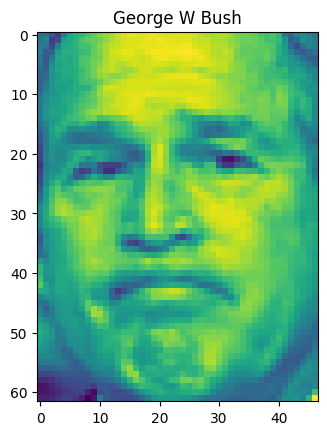

In [ ]:
plt.imshow(X[0].reshape(62, 47)) # reshape to convert vector to matrix
plt.title(target_names[y[0]])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

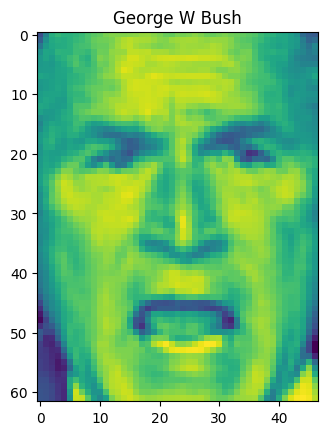

In [ ]:
plt.imshow(X[100].reshape(62, 47)) # reshape to convert vector to matrix
plt.title(target_names[y[100]])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

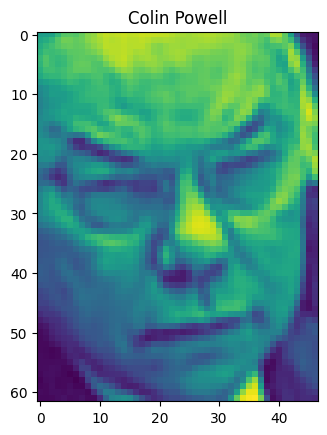

In [ ]:
plt.imshow(X[105].reshape(62, 47)) # reshape to convert vector to matrix
plt.title(target_names[y[105]])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

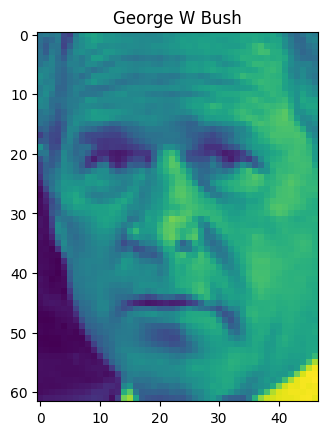

In [ ]:
plt.imshow(X[1005].reshape(62, 47)) # reshape to convert vector to matrix
plt.title(target_names[y[1005]])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

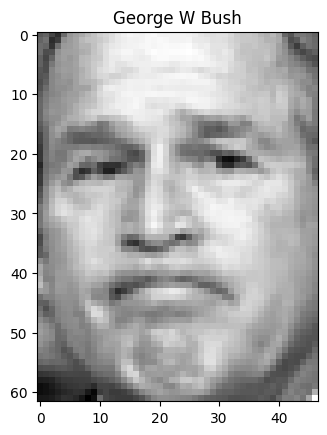

In [ ]:
plt.imshow(X[0].reshape(62, 47), cmap = 'gray') # reshape to convert vector to matrix
plt.title(target_names[y[0]])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

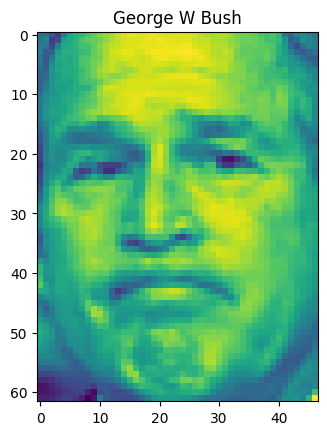

In [ ]:
plt.imshow(lfw.images[0]) # without reshape
plt.title(target_names[y[0]])
plt.show

Now building the model

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = X.shape[1], activation = 'sigmoid')) # input layer
model.add(Dense(target_names.shape[0], activation = 'softmax')) # output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               746240    
                                                                 
 dense_8 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 747525 (2.85 MB)
Trainable params: 747525 (2.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # sgd - stochastic grad decent - not a good learning model
history = model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
29/29 [==============================] - 1s 14ms/step - loss: 1.4599 - accuracy: 0.4265 - val_loss: 1.3653 - val_accuracy: 0.5000
Epoch 2/10
29/29 [==============================] - 0s 8ms/step - loss: 1.3989 - accuracy: 0.4550 - val_loss: 1.3653 - val_accuracy: 0.5000
Epoch 3/10
29/29 [==============================] - 0s 9ms/step - loss: 1.3905 - accuracy: 0.4572 - val_loss: 1.3589 - val_accuracy: 0.5000
Epoch 4/10
29/29 [==============================] - 0s 9ms/step - loss: 1.3746 - accuracy: 0.4583 - val_loss: 1.3534 - val_accuracy: 0.5000
Epoch 5/10
29/29 [==============================] - 0s 8ms/step - loss: 1.3608 - accuracy: 0.4715 - val_loss: 1.3311 - val_accuracy: 0.5000
Epoch 6/10
29/29 [==============================] - 0s 10ms/step - loss: 1.3527 - accuracy: 0.4715 - val_loss: 1.3388 - val_accuracy: 0.5219
Epoch 7/10
29/29 [==============================] - 0s 10ms/step - loss: 1.3412 - accuracy: 0.4825 - val_loss: 1.3163 - val_accuracy: 0.5000
Epoch 8/10
29/29 

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # a better learning model
history = model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
29/29 [==============================] - 2s 28ms/step - loss: 1.7094 - accuracy: 0.4145 - val_loss: 1.3114 - val_accuracy: 0.5307
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 1.3309 - accuracy: 0.5197 - val_loss: 1.2740 - val_accuracy: 0.5088
Epoch 3/10
29/29 [==============================] - 1s 19ms/step - loss: 1.2540 - accuracy: 0.5373 - val_loss: 1.2431 - val_accuracy: 0.5351
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1465 - accuracy: 0.5702 - val_loss: 1.1070 - val_accuracy: 0.5658
Epoch 5/10
29/29 [==============================] - 0s 14ms/step - loss: 1.1076 - accuracy: 0.5910 - val_loss: 1.4032 - val_accuracy: 0.4123
Epoch 6/10
29/29 [==============================] - 0s 13ms/step - loss: 1.0345 - accuracy: 0.5976 - val_loss: 1.0416 - val_accuracy: 0.6667
Epoch 7/10
29/29 [==============================] - 0s 13ms/step - loss: 0.9225 - accuracy: 0.6721 - val_loss: 0.9221 - val_accuracy: 0.6184
Epoch 8/10
29

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = X.shape[1], activation = 'relu')) # replacing sigmoid with relu
model.add(Dense(target_names.shape[0], activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               746240    
                                                                 
 dense_10 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 747525 (2.85 MB)
Trainable params: 747525 (2.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # a better learning model
history = model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
29/29 [==============================] - 1s 19ms/step - loss: 1.9550 - accuracy: 0.3816 - val_loss: 1.2935 - val_accuracy: 0.5351
Epoch 2/10
29/29 [==============================] - 0s 14ms/step - loss: 1.2544 - accuracy: 0.5384 - val_loss: 1.1746 - val_accuracy: 0.5351
Epoch 3/10
29/29 [==============================] - 0s 14ms/step - loss: 1.2068 - accuracy: 0.5614 - val_loss: 1.1487 - val_accuracy: 0.5351
Epoch 4/10
29/29 [==============================] - 0s 13ms/step - loss: 1.0792 - accuracy: 0.5822 - val_loss: 1.0273 - val_accuracy: 0.6053
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9784 - accuracy: 0.6645 - val_loss: 1.0512 - val_accuracy: 0.6447
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9272 - accuracy: 0.6524 - val_loss: 1.0409 - val_accuracy: 0.6447
Epoch 7/10
29/29 [==============================] - 1s 20ms/step - loss: 0.8379 - accuracy: 0.7050 - val_loss: 0.8811 - val_accuracy: 0.6447
Epoch 8/10
29

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = X.shape[1], activation = 'relu'))
model.add(Dense(128, activation = 'relu')) # adding another hidden layer - increases the number of trainable params
model.add(Dense(target_names.shape[0], activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               746240    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 5)                 645       
                                                                 
Total params: 779781 (2.97 MB)
Trainable params: 779781 (2.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # a better learning model
history = model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
29/29 [==============================] - 1s 20ms/step - loss: 1.6090 - accuracy: 0.4364 - val_loss: 1.2802 - val_accuracy: 0.5175
Epoch 2/10
29/29 [==============================] - 0s 13ms/step - loss: 1.3744 - accuracy: 0.5154 - val_loss: 1.2092 - val_accuracy: 0.5439
Epoch 3/10
29/29 [==============================] - 0s 14ms/step - loss: 1.1698 - accuracy: 0.5822 - val_loss: 1.2519 - val_accuracy: 0.5614
Epoch 4/10
29/29 [==============================] - 0s 13ms/step - loss: 1.1218 - accuracy: 0.5779 - val_loss: 1.0706 - val_accuracy: 0.5614
Epoch 5/10
29/29 [==============================] - 0s 15ms/step - loss: 1.0293 - accuracy: 0.6075 - val_loss: 1.0214 - val_accuracy: 0.6316
Epoch 6/10
29/29 [==============================] - 0s 14ms/step - loss: 0.9400 - accuracy: 0.6524 - val_loss: 0.9615 - val_accuracy: 0.6667
Epoch 7/10
29/29 [==============================] - 0s 14ms/step - loss: 0.8182 - accuracy: 0.7182 - val_loss: 0.9564 - val_accuracy: 0.6711
Epoch 8/10
29

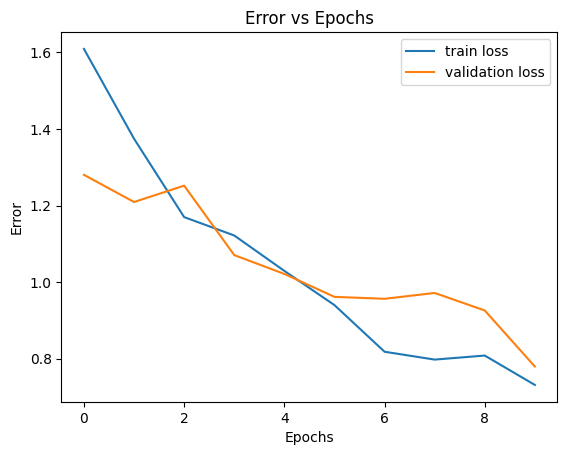

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title("Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # changing optimizer to manually enter learning rate(default 0.01) and other params
history = model.fit(X, y, batch_size = 64, epochs = 25, validation_split = 0.2)

Epoch 1/25
15/15 [==============================] - 1s 29ms/step - loss: 0.5954 - accuracy: 0.8147 - val_loss: 0.7097 - val_accuracy: 0.7719
Epoch 2/25
15/15 [==============================] - 0s 18ms/step - loss: 0.5677 - accuracy: 0.8180 - val_loss: 0.6867 - val_accuracy: 0.7544
Epoch 3/25
15/15 [==============================] - 0s 16ms/step - loss: 0.5500 - accuracy: 0.8399 - val_loss: 0.7052 - val_accuracy: 0.7632
Epoch 4/25
15/15 [==============================] - 0s 17ms/step - loss: 0.5564 - accuracy: 0.8279 - val_loss: 0.6925 - val_accuracy: 0.7851
Epoch 5/25
15/15 [==============================] - 0s 16ms/step - loss: 0.5363 - accuracy: 0.8443 - val_loss: 0.6779 - val_accuracy: 0.7982
Epoch 6/25
15/15 [==============================] - 0s 18ms/step - loss: 0.5369 - accuracy: 0.8257 - val_loss: 0.6755 - val_accuracy: 0.7982
Epoch 7/25
15/15 [==============================] - 0s 19ms/step - loss: 0.5312 - accuracy: 0.8553 - val_loss: 0.6741 - val_accuracy: 0.7544
Epoch 8/25
15

Now digit recognition

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train , y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

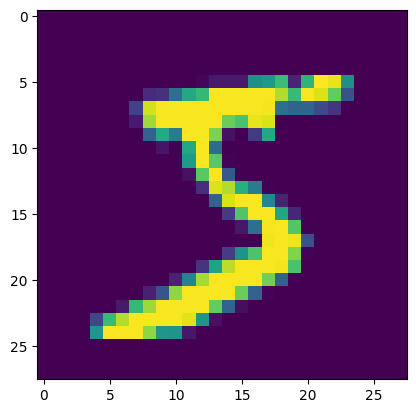

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
print ("Train samples: ", x_train.shape)
print ("Test samples: ", x_test.shape)

Train samples:  (60000, 28, 28)
Test samples:  (10000, 28, 28)


In [ ]:
# normalization of data
x_train[0] / 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#normalize all of em

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train[0]

5

In [ ]:
tf.keras.utils.to_categorical(y_train[0])

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
tf.keras.utils.to_categorical(9)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
print("Train labels shape: ", y_train.shape)
print("Test labels shape: ", y_test.shape)

Train labels shape:  (60000, 10)
Test labels shape:  (10000, 10)


In [ ]:
# onehot encoding
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Now building model

In [ ]:
input_shape = x_train.shape[1:]

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(256, activation = 'relu')) #sigmoid/relu when no.of classes = 2, softmax otherwise
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
epochs = 25
batch_size = 32
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2531 - accuracy: 0.9267 - val_loss: 0.1365 - val_accuracy: 0.9591
Epoch 2/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1062 - accuracy: 0.9687 - val_loss: 0.0988 - val_accuracy: 0.9702
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0824 - val_accuracy: 0.9753
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0909 - val_accuracy: 0.9737
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0809 - val_accuracy: 0.9774
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0937 - val_accuracy: 0.9744
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0774 - val_accur

In [ ]:
# applying model to test set
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9813


[0.11262460798025131, 0.9812999963760376]

In [ ]:
y_pred_test = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
y_pred_test

array([[2.5911704e-16, 9.9718097e-16, 4.2121549e-12, ..., 9.9999994e-01,
        1.7206670e-17, 5.9355587e-09],
       [1.6419242e-22, 3.3044193e-19, 9.9999994e-01, ..., 5.8824201e-31,
        2.1919464e-15, 3.1061084e-35],
       [3.1264759e-13, 9.9999958e-01, 1.1174901e-08, ..., 6.5151461e-08,
        2.3108376e-07, 2.4112863e-16],
       ...,
       [6.0341831e-28, 5.4464945e-24, 1.1733653e-26, ..., 4.7846553e-12,
        1.6109295e-13, 6.3400773e-12],
       [7.2170450e-17, 2.0833915e-20, 2.2582144e-21, ..., 1.1244447e-22,
        1.4732369e-06, 3.0162365e-23],
       [5.6613871e-23, 1.1452801e-25, 6.5949462e-21, ..., 1.5462413e-34,
        1.6965424e-20, 1.8414793e-22]], dtype=float32)

In [ ]:
y_pred_test[0]

array([2.5911704e-16, 9.9718097e-16, 4.2121549e-12, 3.2509877e-11,
       2.6429200e-25, 3.0730425e-17, 1.5455128e-23, 9.9999994e-01,
       1.7206670e-17, 5.9355587e-09], dtype=float32)

In [ ]:
y_pred_test[0].argmax()

7

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)